In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [2]:
# Lectura de base de datos
df = pd.read_csv('DBs\df_sel.csv')
y = pd.read_csv('DBs\y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
y.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df

,servicio_habilitado,via_ingreso,unidad_estrategica,transfusion_sangre,antibiotico,dx_principal_egreso_capitulo,profesional_especialidad_grd,clasificacion_imc,control_diabetes,tiene_hta,...,frecuencia_cardiaca_en_reposo,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,0.666667,0.5,0.333333,0.0,0.0,0.0625,0.586207,0.666667,1.000000,1.0,...,0.192661,0.187535,0.375595,0.068970,0.073067,0.214658,0.141486,0.065060,0.083333,0.765432
1,0.666667,0.5,0.333333,0.0,0.0,0.0625,0.586207,1.000000,0.000000,0.0,...,0.275229,0.147795,0.522063,0.000000,0.000000,0.000000,0.045503,0.099598,0.027778,0.864198
2,0.666667,1.0,0.333333,0.0,0.0,0.3750,0.586207,0.333333,1.000000,1.0,...,0.614679,0.209841,0.242063,0.088553,0.051827,0.213859,0.000000,0.000000,0.000000,0.777778
3,0.666667,1.0,0.333333,0.0,0.0,0.4375,0.068966,1.000000,1.000000,1.0,...,0.211009,0.205458,0.000000,0.085817,0.072218,0.206353,0.005332,0.106024,0.000000,0.802469
4,0.666667,1.0,0.333333,0.0,1.0,0.5000,0.482759,0.666667,0.333333,1.0,...,0.412844,0.627775,0.000000,0.108495,0.068819,0.525542,0.699253,0.062651,0.000000,0.283951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.666667,1.0,0.333333,0.0,1.0,0.4375,0.068966,0.333333,0.666667,1.0,...,0.724771,0.230517,0.533770,0.320374,0.050127,0.274256,0.000000,0.069880,0.055556,0.666667
1469,1.000000,1.0,1.000000,0.0,0.0,0.9375,0.655172,0.333333,0.333333,1.0,...,0.532110,0.410321,0.000000,0.050468,0.095157,0.146615,0.076431,0.094779,0.000000,0.827160
1470,0.666667,1.0,0.333333,0.0,0.0,0.7500,0.241379,0.666667,0.000000,1.0,...,0.192661,0.404256,0.000000,0.000000,0.000000,0.000000,0.000000,0.061847,0.000000,0.679012
1471,0.666667,1.0,0.333333,0.0,0.0,0.3750,0.586207,0.000000,0.333333,1.0,...,0.165138,0.506070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950617


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes un DataFrame 'data' con una columna llamada 'variable_a_escalar'
scaler = MinMaxScaler()
y['tiempo_estancia'] = scaler.fit_transform(y[['tiempo_estancia']])

In [5]:
#separacion de datos
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=0)

# <h1> LGBMRegressor

In [6]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.001, 1.0, log=True)  # Agrega la regularización L1
    }
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [7]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2023-10-30 11:49:36,775] A new study created in memory with name: no-name-3dff3d48-2a5d-47c1-82a5-71e4cbdc7b50


[I 2023-10-30 11:49:37,433] Trial 0 finished with value: 0.0877471940983828 and parameters: {'learning_rate': 0.0019434819625589583, 'num_leaves': 296, 'subsample': 0.3177873124629674, 'colsample_bytree': 0.07553081185860273, 'min_data_in_leaf': 88, 'reg_alpha': 0.03539080742608147}. Best is trial 0 with value: 0.0877471940983828.
[I 2023-10-30 11:49:37,696] Trial 1 finished with value: 0.08590255899676878 and parameters: {'learning_rate': 0.004536064007533648, 'num_leaves': 181, 'subsample': 0.12775067188578054, 'colsample_bytree': 0.49771495340483973, 'min_data_in_leaf': 56, 'reg_alpha': 0.3409617295918874}. Best is trial 1 with value: 0.08590255899676878.
[I 2023-10-30 11:49:38,179] Trial 2 finished with value: 0.08312261114343573 and parameters: {'learning_rate': 0.04571282805966808, 'num_leaves': 628, 'subsample': 0.5156355104593922, 'colsample_bytree': 0.862754876388062, 'min_data_in_leaf': 87, 'reg_alpha': 0.03446650528200542}. Best is trial 2 with value: 0.08312261114343573.
[I

In [8]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.015835780878344176, 'num_leaves': 28, 'subsample': 0.9549413238936834, 'colsample_bytree': 0.9715977231094183, 'min_data_in_leaf': 2, 'reg_alpha': 0.0011954593782717716}
Best RMSE: 0.0723525185902516


In [28]:
#Creacion modelo RandomForest
m_lgb=lgb.LGBMRegressor(learning_rate=0.015835780878344176,num_leaves=28,subsample=0.9549413238936834,colsample_bytree=0.9715977231094183,min_data_in_leaf=2,reg_alpha=0.0011954593782717716)
m_lgb.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1987
[LightGBM] [Info] Number of data points in the train set: 1031, number of used features: 38
[LightGBM] [Info] Start training from score 0.077898


LGBMRegressor(colsample_bytree=0.9715977231094183,
              learning_rate=0.015835780878344176, min_data_in_leaf=2,
              num_leaves=28, reg_alpha=0.0011954593782717716,
              subsample=0.9549413238936834)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Supongamos que ya has ajustado tu modelo y tienes los conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_lgb.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_lgb.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
Train - MAE: 79.49474208640912
Train - RMSE: 108.19135634908798
Test - MAE: 106.03711854316273
Test - RMSE: 167.3829482535093


# <h1> RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    # Define el espacio de búsqueda para los hiperparámetros
    n_estimators = trial.suggest_int("n_estimators", 10, 100)
    max_depth = trial.suggest_int("max_depth", 1, 100)
    max_features = trial.suggest_float("max_features", 0.1, 0.9)
    #criterion = trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "friedman_mse", "poisson"])  # Agrega las opciones de criterion

    # Crea el modelo RandomForestRegressor con los hiperparámetros sugeridos
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        #criterion=criterion,  # Establece el hiperparámetro criterion
        random_state=42  # Ajusta la semilla si es necesario
    )

    # Entrena el modelo y realiza predicciones
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calcula la métrica objetivo (en este caso, RMSE)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    return rmse

# Crea un estudio de Optuna y realiza la búsqueda de hiperparámetros
study = optuna.create_study(direction="minimize")  # Minimiza el RMSE
study.optimize(objective, n_trials=100)  # Número de iteraciones

# Obtiene los mejores hiperparámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

[I 2023-10-30 11:53:15,906] A new study created in memory with name: no-name-3c2adfb0-e612-45b1-9768-701bea3a7aa0
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2023-10-30 11:53:18,106] Trial 0 finished with value: 0.07451524948973298 and parameters: {'n_estimators': 61, 'max_depth': 46, 'max_features': 0.5586549323180086}. Best is trial 0 with value: 0.07451524948973298.
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[I 2023-10-30 11:53:19,501] Trial 1 finished with value: 0.0757405881103469

Mejores hiperparámetros: {'n_estimators': 24, 'max_depth': 14, 'max_features': 0.6821143791881882}


In [30]:
m_rfr=RandomForestRegressor(n_estimators=24,max_depth=14,max_features=0.6821143791881882,criterion='absolute_error')
m_rfr.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='absolute_error', max_depth=14,
                      max_features=0.6821143791881882, n_estimators=24)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Supongamos que ya has ajustado tu modelo y tienes los conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_rfr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_rfr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 51.41145016353572
Train - RMSE: 81.1903209836631
Test - MAE: 107.91700454821832
Test - RMSE: 164.49618967151662


# <h1> GradientBoostingRegressor

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define el modelo GradientBoostingRegressor
model = GradientBoostingRegressor()

# Define una distribución de parámetros válidos
param_dist = {
    'n_estimators': np.arange(10, 50, 200),  # Valores entre 50 y 500 en incrementos de 50
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': np.arange(3, 5, 15),  # Valores entre 3 y 12 en incrementos de 3
    'min_samples_split': np.arange(2, 10, 20)  # Valores entre 2 y 20 en incrementos de 10
}

# Crea un objeto RandomizedSearchCV con el modelo y la distribución de parámetros
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')

# Realiza la búsqueda aleatoria de hiperparámetros en tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores parámetros:", best_params)

# Obtén el mejor modelo
best_model = random_search.best_estimator_

# Evalúa el modelo en tus datos de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error en el conjunto de prueba:", mse)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed 

Mejores parámetros: {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.2}
Mean Squared Error en el conjunto de prueba: 0.005225312384414792


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import optuna

# Define la función objetivo
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, log=True),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'loss': trial.suggest_categorical('loss', ['huber', 'quantile', 'absolute_error', 'squared_error'])
    }
    
    model = GradientBoostingRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

# Inicializa el estudio de Optuna
study = optuna.create_study(direction='minimize')

# Realiza la optimización con un número de iteraciones específico
n_trials = 50
study.optimize(objective, n_trials=n_trials)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Realiza predicciones con el mejor modelo
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE en el conjunto de prueba con los mejores hiperparámetros:", rmse)

[I 2023-10-30 12:14:32,707] A new study created in memory with name: no-name-15304903-9a98-467c-b2bf-8b4b07286282
C:\Users\Dell\AppData\Local\Temp\ipykernel_16484\1785254830.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-10-30 12:14:33,283] Trial 0 finished with value: 0.08837489958701499 and parameters: {'n_estimators': 181, 'learning_rate': 0.015851928477288026, 'max_depth': 6, 'min_samples_split': 0.1925066635268129, 'min_samples_leaf': 0.19451106981440064,

Mejores hiperparámetros: {'n_estimators': 368, 'learning_rate': 0.0875292830302247, 'max_depth': 8, 'min_samples_split': 0.6438086781380998, 'min_samples_leaf': 0.1742766818931783, 'subsample': 0.9992833084672846, 'max_features': 'log2', 'loss': 'squared_error'}
RMSE en el conjunto de prueba con los mejores hiperparámetros: 0.08061723352056895


In [88]:
m_rfr=GradientBoostingRegressor(n_estimators=368,max_depth=3,learning_rate=0.005,subsample=0.9992833084672846)
m_rfr.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.005, n_estimators=368,
                          subsample=0.9992833084672846)

In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Supongamos que ya has ajustado tu modelo y tienes los conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_rfr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_rfr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 99.88294426703207
Train - RMSE: 152.9355143605871
Test - MAE: 106.61540467301772
Test - RMSE: 164.86643192442816


# <h1> SVR

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define el modelo SVR
svr = SVR()

# Define las distribuciones de hiperparámetros que deseas explorar
param_dist = {
    'C': np.logspace(-3, 2, 100),  # Rango de valores para el hiperparámetro C
    'kernel': ['linear', 'poly', 'rbf'],  # Kernels a considerar
    'degree': np.arange(2, 6),  # Grados del kernel polinómico
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 100)),  # Valores de gamma
}

# Crea un objeto RandomizedSearchCV con el modelo y la distribución de parámetros
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error')

# Realiza la búsqueda aleatoria de hiperparámetros en tus datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtiene los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtén el mejor modelo SVR
best_svr = random_search.best_estimator_

# Evalúa el modelo en tus datos de prueba
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error en el conjunto de prueba:", mse)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConve

Mejores hiperparámetros: {'kernel': 'linear', 'gamma': 55.90810182512222, 'degree': 4, 'C': 7.742636826811269}
Mean Squared Error en el conjunto de prueba: 0.006776958375533421


In [32]:
m_rfr=SVR(kernel= 'linear', gamma=55.90810182512222, degree= 4, C=7.742636826811269)
m_rfr.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=7.742636826811269, degree=4, gamma=55.90810182512222, kernel='linear')

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Supongamos que ya has ajustado tu modelo y tienes los conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_rfr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_rfr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 132.10040096123495
Train - RMSE: 177.49392293825798
Test - MAE: 130.36472726669888
Test - RMSE: 187.84034902193977


# <h1> Comparación de modelos con CrossValidation

In [20]:


#Creacion modelo Gradient Boosting Regression
m_gbr = GradientBoostingRegressor(n_estimators=250,min_samples_split=3,max_depth=4,learning_rate=0.01,criterion='squared_error')

#Creacion modelo Support Vector Machine Regression
m_svr=SVR(kernel= 'linear', gamma= 1.5199110829529332, degree= 2, C=  0.9545484566618337)

#Creacion modelo Random Forest Regression
m_rfr=RandomForestRegressor(n_estimators=210,max_depth=30,max_features=0.6057085724463632,criterion='absolute_error')

#Creacion modelo LightGBM
m_lgb=lgb.LGBMRegressor(learning_rate=0.01839434325254224,num_leaves=3,subsample=0.4735801498785045,colsample_bytree=0.7499677630587668,min_data_in_leaf=2,reg_alpha=0.05861587518835721)

#lista de modelos
m=([ m_gbr,m_svr,m_rfr,m_lgb])

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
def medir_modelos(modelos, scoring, X, y, cv):
    metric_modelos = pd.DataFrame()
    for i, modelo in enumerate(modelos):
        scores = cross_val_score(modelo, X, y, scoring=scoring, cv=cv)
        col_name = f'm{i + 1}_{modelo.__class__.__name__}'  # Nombre de columna con número de modelo y nombre del modelo
        pdscores = pd.DataFrame(scores, columns=[col_name])
        metric_modelos = pd.concat([metric_modelos, pdscores], axis=1)
    return metric_modelos


rmse1 = medir_modelos(m, 'neg_mean_squared_error', df, y, 4)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 1104, number of used features: 38
[LightGBM] [Info] Start training from score 0.075004
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, t

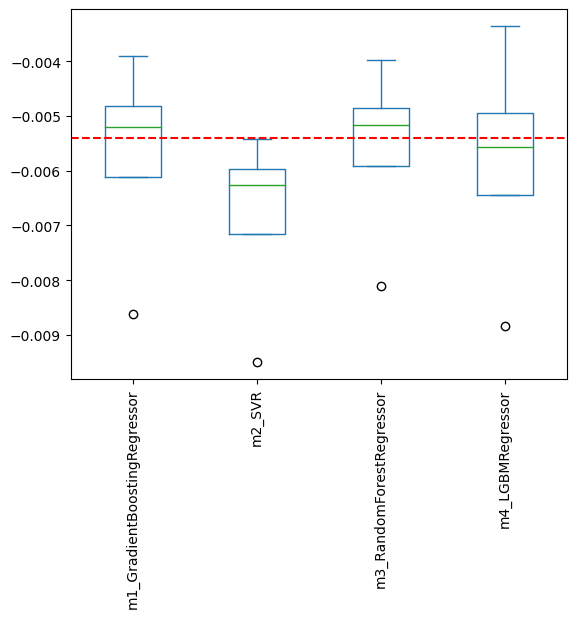

In [22]:
# Crear el gráfico de caja
ax = rmse1.plot(kind='box')
ax.axhline(y=-0.0054, color='r', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Mostrar el gráfico
plt.show()